# INM 702 Task 1
## Faisal Mungi
## faisal.mungi@city.ac.uk

In [33]:
# method for visualizing path
def plot_path(path):
  a,b = zip(*path)
  plt.plot(b,a)
  plt.scatter(b,a, color = "red")
  plt.gca().invert_yaxis()
  plt.xticks(np.arange(len(grid[0])))
  plt.grid()
  plt.show()

In [34]:
import pandas as pd

# dataframe to store results

results = pd.DataFrame(columns = ['Case','Heuristic M1', 'Heuristic M2','Dijkstra M1', 'Dijkstra M2'])



In [35]:
#import random
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng()



class GenerateGrid:
    def makegrid(self, mode, x1,y1):
        np.random.seed(66)#44
        x = np.random.randint(2,15)
        y = np.random.randint(2,15)

        if mode == 9:
          x = x1
          y = y1
          val = np.random.randint(2,15, size = x*y)
        if mode == 1:
          np.random.seed(77)#88
          val = np.random.randint(2,15, size = x*y)
        elif mode == 2:
          #using uniform distribution
          ub = np.random.randint(10, 16)
          lb = np.random.randint(1, 5)
          val = np.random.uniform(lb, ub, size = x*y)
          val = np.round(val,1)
        elif mode == 3:
          #using Poisson distribution
          num = np.random.randint(5,15)
          val = np.random.poisson(lam = num, size = x*y)
        elif mode == 4:
          #using binomial distribution
          num = np.random.randint(5,10)
          prob = np.random.rand()
          val = np.random.binomial(n = num, p = prob, size = x*y)
        
        val = np.reshape(val,(x,y))
        
        return val
    
    def printgrid(self, grid):
        g1 = " _______" * len(grid[0])
        for i in range(len(grid)):
            print(g1)
            for j in range(len(grid[0])):
                print("|  {}\t".format(grid[i][j]),end = '')
            print("|")
        print(g1)

        
        
class Navigate:
    def simpleappr(self,grid, mode):
        x = len(grid)-1
        y = len(grid[0])-1
        path = []
        flag = True
        i=0
        j=0
        #curr_pos = (i,j)
        cost = 0
        path.append((i,j))
        # only selecting from moving right or down where possible
        while (flag):

            if i < x:
              if mode:
                down1 = grid[i+1][j]
              else:
                down1 = abs(grid[i+1][j] - grid[i][j])

            else: down1 = 10000
            if j < y:
              if mode:
                right1 = grid[i][j+1]
              else:
                right1 = abs(grid[i][j+1] - grid[i][j])
            else: right1 = 10000

            if down1 < right1:
              i = i+1
              if not mode:
                cost += down1

            else: 
              j = j+1
              if not mode:
                cost += right1
            path.append((i,j))
            if mode:
              cost += grid[i][j]
            if (i==x and j == y):
                flag = False
        
        return path, cost
       
        
gengrid = GenerateGrid()
grid = gengrid.makegrid(1,0,0)

print("Number of Rows -> ",len(grid))
print("Number of Columns -> ",len(grid[0]))

print("Generating random grid\n\n",grid)




Number of Rows ->  6
Number of Columns ->  14
Generating random grid

 [[ 9  6  6 13  7 10  2 11  9  7 14  5  2 13]
 [ 8  6  8  6  7 12  9  5 13  3 13  3 11  8]
 [ 6  7 10 14  3 10  3 12  8  5  6  5 11 14]
 [ 2 14 10 11  7 13 14  5  4  6  6  7  8 14]
 [ 7 12  3  4 11  6 14  5 11 10  4  2 10  9]
 [ 9  7 12  5  6 13 13  4  8  9  8  4 13 13]]


In [36]:
#Visualizing Grid
print("\nVisualizing Grid\n")
gengrid.printgrid(grid)



Visualizing Grid

 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  9	|  6	|  6	|  13	|  7	|  10	|  2	|  11	|  9	|  7	|  14	|  5	|  2	|  13	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  8	|  6	|  8	|  6	|  7	|  12	|  9	|  5	|  13	|  3	|  13	|  3	|  11	|  8	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  6	|  7	|  10	|  14	|  3	|  10	|  3	|  12	|  8	|  5	|  6	|  5	|  11	|  14	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  2	|  14	|  10	|  11	|  7	|  13	|  14	|  5	|  4	|  6	|  6	|  7	|  8	|  14	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  7	|  12	|  3	|  4	|  11	|  6	|  14	|  5	|  11	|  10	|  4	|  2	|  10	|  9	|
 _______ _______ _______ ____



HEURSISTIC APPROACH 


MODE 1
Path taken ->  [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  145
Visualizing Path taken 


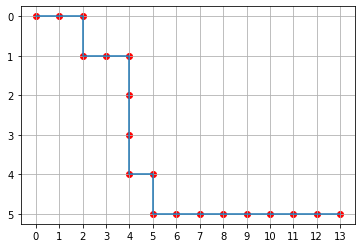

In [37]:
#Heuristic Mode1
nav = Navigate()
path, cost1 = nav.simpleappr(grid,True)

print("\n\nHEURSISTIC APPROACH \n\n\nMODE 1\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost1)
print("Visualizing Path taken ")
plot_path(path)



HEURISTIC APPROACH


MODE 2
Path taken ->  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  56
Visualizing Path taken 


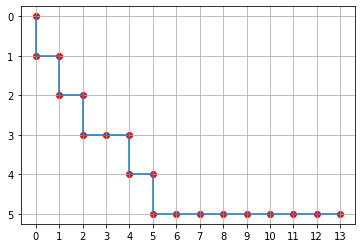

In [38]:
#Heuristic Mode2

path, cost2 = nav.simpleappr(grid,False)

print("\nHEURISTIC APPROACH\n\n\nMODE 2\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost2)
print("Visualizing Path taken ")
plot_path(path)

In [39]:
import heapq

class Dijkstra:
    
        
    
    def shortpath(self, grid, mode):
        x = len(grid)-1
        y = len(grid[0])-1
        #print("val of y ",y)
        visited = np.zeros((x+1,y+1))
        check = np.ones((x+1,y+1))
        
        dist = np.zeros((x+1,y+1))
        visited[0][0] = 1
        #print(visited)
        dist[0][0] = 0
        prevloc = {}
        
        i = j = 0
        path = []
        hq = []
        #print(type(i))
        #checkadj(grid,i,j)
        #if (i<x):
        flag = True
        # mode is to select the game mode 1 or 2
        while (flag):
            if(i<x): # checking for cell in next row
                if (visited[i+1][j] == 0): # if the cell hasnt been visited earlier
                    
                    visited[i+1][j] = 1
                    if(mode):
                      dist[i+1][j] = dist[i][j] + grid[i+1][j]
                    #                   dist        cell pos
                    else: 
                      dist[i+1][j] = dist[i][j] + abs(grid[i][j] - grid[i+1][j])
                    
                    heapq.heappush(hq,(dist[i+1][j],(i+1,j) ) )
                    #           next loc   prev cell (coming from)
                    prevloc[(i+1,j)] = [i,j]
                else: # if the cell was visited earlier. check previous distance from start and current distance, if better then update
                    #a,b = prevloc[(i+1,j)]
                    #dis1 = dist[a][b]
                    if(mode):
                      ds = dist[i][j] + grid[i+1][j]
                    else:
                      ds = dist[i][j] + abs(grid[i][j] - grid[i+1][j])
                    if ds < dist[i+1][j]:
                        dist[i+1][j] = ds
                        prevloc[(i+1,j)] = [i,j]
            
            if (i>0):
                if (visited[i-1][j]!=1):
                    
                    visited[i-1][j] = 1
                    if(mode):
                      dist[i-1][j] = dist[i][j] + grid[i-1][j]
                    #                   dist        cell pos
                    else:
                      dist[i-1][j] = dist[i][j] + abs(grid[i][j] - grid[i-1][j])
                    heapq.heappush(hq,(dist[i-1][j],(i-1,j) ) )
                    #        next loc   prev cell (coming from)
                    prevloc[(i-1,j)] = [i,j]
                else:
                    #a,b = prevloc[(i+1,j)]
                    #dis1 = dist[a][b]
                    if(mode):
                      ds = dist[i][j] + grid[i-1][j]
                    else:
                      ds = dist[i][j] + abs(grid[i][j] - grid[i-1][j])
                    if ds < dist[i-1][j]:
                        dist[i-1][j] = ds
                        prevloc[(i-1,j)] = [i,j]
                
            if (j<y):
                #print(i," & ",j)
                if (visited[i][j+1]!=1):
                    
                    visited[i][j+1] = 1
                    if(mode):
                      dist[i][j+1] = dist[i][j] + grid[i][j+1]
                    #                   dist        cell pos
                    else:
                      dist[i][j+1] = dist[i][j] + abs(grid[i][j] - grid[i][j+1])
                    heapq.heappush(hq,(dist[i][j+1],(i,j+1) ) )
                    #        next loc   prev cell (coming from)
                    prevloc[(i,j+1)] = [i,j]
                else:
                    #a,b = prevloc[(i+1,j)]
                    #dis1 = dist[a][b]
                    if(mode):
                      ds = dist[i][j] + grid[i][j+1]
                    else:
                      ds = dist[i][j] + abs(grid[i][j] - grid[i][j+1])
                    if ds < dist[i][j+1]:
                        dist[i][j+1] = ds
                        prevloc[(i,j+1)] = [i,j]
            
            
            if (j>0):
                if (visited[i][j-1]!=1):
                    
                    visited[i][j-1] = 1
                    if (mode):
                      dist[i][j-1] = dist[i][j] + grid[i][j-1]
                    #                   dist        cell pos
                    else:
                      dist[i][j-1] = dist[i][j] + abs(grid[i][j] - grid[i][j-1])
                    heapq.heappush(hq,(dist[i][j-1],(i,j-1) ) )
                    #        next loc   prev cell (coming from)
                    prevloc[(i,j-1)] = [i,j]
                else:
                    #a,b = prevloc[(i+1,j)]
                    #dis1 = dist[a][b]
                    if (mode):
                      ds = dist[i][j] + grid[i][j-1]
                    else:
                      ds = dist[i][j] + abs(grid[i][j] - grid[i][j-1])
                    if ds < dist[i][j-1]:
                        dist[i][j-1] = ds
                        prevloc[(i,j-1)] = [i,j]
            
            #print(dist)
            heapq.heapify(hq)
            if hq:
                val = heapq.heappop(hq)
                i,j = val[1]
            
            # if goal is reached exit the loop
            if (i == len(grid) and j == len(grid[0])):
                flag = False
            # if all cells have been visited, exit loop
            if (np.array_equal(check, visited)):
              flag = False
        #print(prevloc)

        #path = []
        path.append((x,y))
        #print(path)
        i = x
        j = y
        flag = True
        while (flag):
          #print(path)
          if (i==0 and j == 0):
            flag = False
            continue
          a,b = prevloc[(i,j)]
          path.append((a,b))
          
          i = a
          j = b
        # reversing the path from the final cell to the initial cell using the data in prevloc
        #path = path.reverse()
        #print(path.reverse())
        path.reverse()
        #print(path)
        
        #print("The cost of taking the Shortest Path Using Dijkstra's Algo is ",dist[x][y])

        return prevloc, path, dist[x][y]
            
print("Number of Rows -> ",len(grid))
print("Number of Columns -> ",len(grid[0]))


Number of Rows ->  6
Number of Columns ->  14



 DIJKSTRA's ALGORITHM


MODE 1

Path Taken ->  [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (3, 8), (3, 9), (3, 10), (4, 10), (4, 11), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  118.0

Visualizing Path 



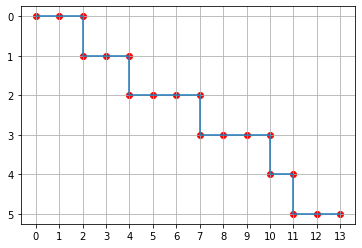

In [40]:
dij = Dijkstra()
#mode = True for Game mode 1; = False for Game mode 2
prevloc, path, cost3 = dij.shortpath(grid, True)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 1\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost3)
print("\nVisualizing Path \n")
plot_path(path)
#print(prevloc)


 DIJKSTRA's ALGORITHM


MODE 2

Path Taken ->  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 12), (5, 12), (5, 13)]

The cost to reach goal is ->  38.0

Visualizing Path 



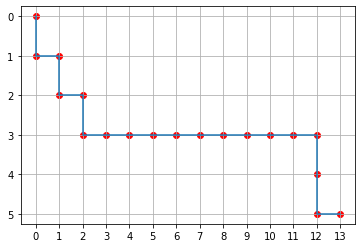

In [41]:
prevloc, path, cost4 = dij.shortpath(grid, False)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 2\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost4)
print("\nVisualizing Path \n")
plot_path(path)
